# Delivery Anomaly Detection Workflow

This notebook covers the process of detecting anomalies in delivery data using machine learning:


1. Import Required Libraries
2. Load and Preprocess Dataset
3. Feature Engineering
4. Train Isolation Forest Model
5. Visualize and Interpret Anomalies
6. Save Anomaly Detection Model


In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import IsolationForest
import joblib

In [2]:
# Load and Preprocess Dataset
import sys, os
sys.path.append(os.path.abspath("../src"))
from data_loader import load_delivery_data
df = load_delivery_data()
df['receipt_time'] = pd.to_datetime(df['receipt_time'], format='%m-%d %H:%M:%S')
df['sign_time'] = pd.to_datetime(df['sign_time'], format='%m-%d %H:%M:%S')
df['delivery_minutes'] = (df['sign_time'] - df['receipt_time']).dt.total_seconds() / 60
df = df.dropna(subset=['delivery_minutes'])
cat_cols = ['from_city_name', 'delivery_user_id']
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [3]:
# Feature Engineering and Scaling
features = ['from_city_name', 'delivery_user_id', 'poi_lng', 'poi_lat', 'receipt_lng', 'receipt_lat', 'sign_lng', 'sign_lat', 'delivery_minutes']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# Train Isolation Forest Model and Detect Anomalies
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['anomaly'] = iso_forest.fit_predict(X_scaled)
print(df['anomaly'].value_counts())

anomaly
 1    448798
-1     23621
Name: count, dtype: int64


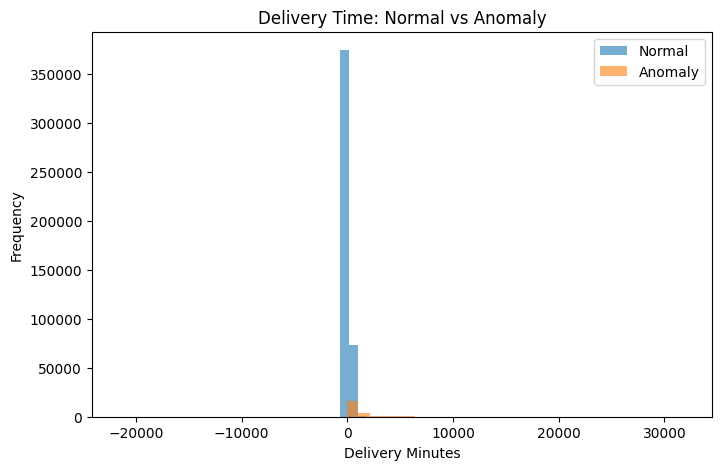

In [5]:
# Visualize Anomalies in Delivery Time
plt.figure(figsize=(8,5))
plt.hist(df[df['anomaly']==1]['delivery_minutes'], bins=30, alpha=0.6, label='Normal')
plt.hist(df[df['anomaly']==-1]['delivery_minutes'], bins=30, alpha=0.6, label='Anomaly')
plt.xlabel('Delivery Minutes')
plt.ylabel('Frequency')
plt.title('Delivery Time: Normal vs Anomaly')
plt.legend()
plt.show()

In [6]:
# Save the trained anomaly detection model
joblib.dump(iso_forest, '../src/anomaly_detection_model.pkl')
print('Anomaly detection model saved to ../src/anomaly_detection_model.pkl')

Anomaly detection model saved to ../src/anomaly_detection_model.pkl
